<img src="https://drive.google.com/uc?id=1Oj6yPUd6IG1yoNg1F-wGZlwVAJesgCi7" width="210" alt="" style="float:right;margin:15px;">

# Week 03 - Mechanism Position Analysis (4bar linkage)
**This short notebook is a first try towards some more detailed course/reader material in the course [41365 Robust Design of products & mechanisms](https://kurser.dtu.dk/course/41635) at the [Technical University of Denmark](https://www.dtu.dk/). It can be distributed under the   terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).**

**Author:** [Tobias Eifler](https://orbit.dtu.dk/en/persons/tobias-eifler) (<tobeif@mek.dtu.dk>)  

This notebook contains some simple Python scripts using the libraries below. While not needed for the course at all, you are of course welcome to consult the corresponding documentation for the pretty standard packages numpy, scipy, pandas etc.

# Graphical Position Analysis
While the first part of [course 41635](https://learn.inside.dtu.dk/) is mainly focusing on the *Predictability* phase, i.e., driven by the questions how to choose a suitable mechanism and how to ensure its predictable behaviour, a full evaluation of the mechanism of course requires a more detailed, quantitative approach. The following overview therefore provides a first glimpse towards the more quantitative description of simple mechanism, here a planar 4 bar linkage. 

Following fundamental literature, e.g., *Myszka (2012) - Machines & Mechanisms* or also the nice summary provided in [Mechanism Position Analysis](https://scholar.cu.edu.eg/?q=anis/files/week04-mdp206-position_analysis-draft.pdf), the first step of a mechanism analysis is a graphical representation. As stated in the above referenced slidedeck, this "graphical analysis of the problem is trivial and can be done using only high school geometry of the linkage".

In general, the notation defines four links 1 (frame), 2 (input link), 3 (coupler), 4 (output link) and the corresponding angles $\Theta_1$ (angle of the frame, i.e. $\Theta_1 = 0$), $\Theta_2$ (angle between frame and input link), $\Theta_3$ (angle of the coupler), and $\Theta_4$ (angle between frame and output link), as also shown in the figure below. Hereby, please note that a 4 bar linkage has two possible configurations given by the *open* and the *crossed* setup.


<img src="https://drive.google.com/uc?id=1FFP4-JdK7Bt_mOtqpybUbE4wsPYInY6P" width=800px>


Furthermore, it is important to consider that not all length combinations, i.e, $a, b, c, d$ as shown in the image on the right, are allowing for a crank movement (a full rotation) of the input arm or are leading to a feasible mechanism at all. For more on this question, see also the course material from [Week 3](https://learn.inside.dtu.dk/).

# Algebraic Position Analysis
Based on the graphical representation, different mechanism types can be analysed based on the corresponding vector-loop equations. For the 4 bar linkage the corresponding vector loop $R_2+R_3-R_4-R_1=0$ is visualised in the image below.     

<img src="https://drive.google.com/uc?id=1T0FrmfllmJ8VHouGVCyH1X33CUXrdyYw" width=500px>

Based on the fundamental trigonometry of the problem, and disregarding the general description of the vector loop in complex numbers, it correspondingly follows that:
\begin{equation}
 a\cos\Theta_2+b\cos\Theta_3-c\cos\Theta_4-d = 0\\
 a\sin\Theta_2+b\sin\Theta_3-c\sin\Theta_4 = 0  
\end{equation}

Accordingly, the problem includes two equations for the two unknow angles $\theta_3 , \theta_4$. Herby, the angle $\Theta_2$ is considered as the input, e.g. a motor driving the mechanism. Solving the problem requires some algebraic manipulation, which is described in more detail in [Mechanism Position Analysis](https://scholar.cu.edu.eg/?q=anis/files/week04-mdp206-position_analysis-draft.pdf) and covered by the script below.

The script is currently providing an animation based on the specified input parameters and a full rotation of the input link (a crank mechanism). But please feel free of course to adapt towards other type of inputs, towards plotting the angles in dependency of time, to include tolerances and calculate specific deviation of relevant points of interest, etc.

<IPython.core.display.Javascript object>


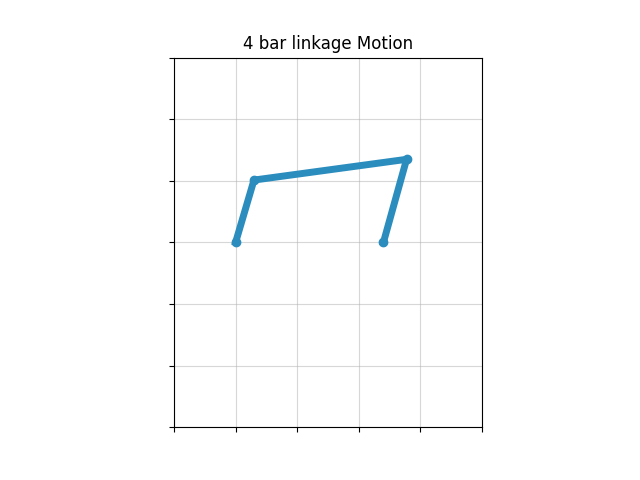

In [1]:
# import necessary packages
import numpy as np
from numpy import pi, sin, cos, sqrt, absolute, arcsin, arccos, arctan, sign
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Enable interactive plot
%matplotlib notebook 

# input parameters
a = 10.55  # crank radius
b = 25.0  # connecting rod length
c = 14.0  # rocker radius
d = 24.0  # center-to-center distance

# coordinates of the crank center point : Point 1
x1 = 0
y1 = 0

# Coordinates of the rocker center point: Point 4
x4 = d
y4 = 0


# create the angle array, where the last angle is the number of rotations*2*pi
rot_num = 6  # number of crank rotations
increment = 0.1  # angle incremement
angle_minus_last = np.arange(0, rot_num * 2 * pi, increment)
R_Angles = np.append(angle_minus_last, rot_num * 2 * pi)


# create arrays for link positions
X2 = np.zeros(len(R_Angles))  # array of crank x-positions: Point 2
Y2 = np.zeros(len(R_Angles))  # array of crank y-positions: Point 2
RR_Angle = np.zeros(len(R_Angles))  # array of rocker arm angles
X3 = np.zeros(len(R_Angles))  # array of rocker x-positions: Point 3
Y3 = np.zeros(len(R_Angles))  # array of rocker y-positions: Point 3

# find the crank and connecting rod positions for each angle
# (Solution of the vector loop equation can be found in https://scholar.cu.edu.eg/?q=anis/files/week04-mdp206-position_analysis-draft.pdf)

for index, R_Angle in enumerate(R_Angles, start=0):
    phi2 = R_Angle
    x2 = a * np.cos(phi2)  # x-cooridnate of the crank: Point 2
    y2 = a * np.sin(phi2)  # y-cooridnate of the crank: Point 2
    
    K1 = d/a
    K2 = d/c
    K3 = (a**2 - b**2 + c**2 + d**2)/(2*a*c)
    K4 = d/b
    K5 = (c**2 - d**2 - a**2 - b**2)/(2*a*b)
    A = np.cos(phi2) - K1 - K2*np.cos(phi2) + K3
    B = -2*np.sin(phi2)
    C = K1 - (K2+1)*np.cos(phi2) + K3
    phi4_1 = 2*np.arctan2((-B+np.sqrt(B**2 - 4*A*C)),(2*A))
    phi4_2 = 2*np.arctan2((-B-np.sqrt(B**2 - 4*A*C)),(2*A))
    
    
    D = np.cos(phi2) - K1 + K4 * np.cos(phi2) + K5
    E = -2*np.sin(phi2)
    F = K1 + (K4-1)*np.cos(phi2) + K5
    
    phi3_1 = 2*np.arctan2((-E + np.sqrt(E**2 - 4*D*F)),(2*D)) # angle not used for the animation
    phi3_2 = 2*np.arctan2((-E - np.sqrt(E**2 - 4*D*F)),(2*D)) # angle not used for the animation
    
# coordinates of the rocker moving point: Point 3
    x3 = c * np.cos(phi4_2) + d
    y3 = c * np.sin(phi4_2)
   
    X2[index] = x2  # store the crankshaft x-position
    Y2[index] = y2  # store the crankshaft y-position
    X3[index] = x3  # store the connecting rod x-position
    Y3[index] = y3  # store the connecting rod y-position

# set up the Matplotlib figure and subplot
fig = plt.figure()
ax = fig.add_subplot(
    111, aspect="equal", autoscale_on=False, xlim=(-10, 40), ylim=(-30, 30)
)

# add grid lines, title and take out the axis tick labels
ax.grid(alpha=0.5)
ax.set_title("4 bar linkage Motion")
ax.set_xticklabels([])
ax.set_yticklabels([])
line, = ax.plot(
    [], [], "o-", lw=5, color="#2b8cbe"
) 

# initialization function
def init():
    line.set_data([], [])
    return (line,)


# animation function
def animate(i):
    x_points = [x1, X2[i], X3[i], x4]
    y_points = [y1, Y2[i], Y3[i], y4]

    line.set_data(x_points, y_points)
    return (line,)

# call the animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(X2), interval=40
)

## to save animation locall, uncomment the line below. Ensure ffmpeg is installed:
## ani.save('crank_and_rocker_motion_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
plt.show()